<a href="https://colab.research.google.com/github/anashamad9/Netflix-Time-Analyzing/blob/main/NetflixProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

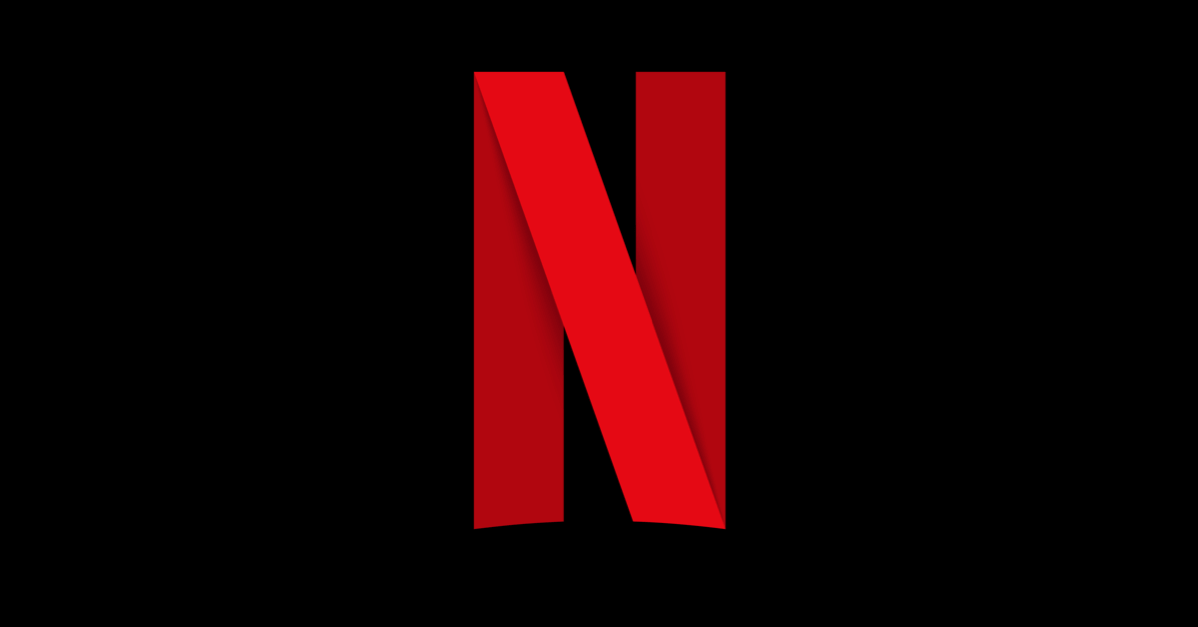

#Have Netflix movies become shorter?


**Analyzing Trends in Netflix Movies**

Netflix has revolutionized the way we consume entertainment, evolving from a DVD rental service to a global streaming giant. In this project, we delve into the world of Netflix movies, exploring trends and patterns in their duration, release year, and genre composition.

**Understanding the Data**

We begin by importing a dataset containing information about Netflix movies, including details such as title, release year, duration, genre, and more. This dataset provides a comprehensive view of the diverse range of movies available on the platform.

**Filtering the Data**

To focus our analysis on movies specifically, we filter out TV shows from the dataset, creating a subset that contains only movie entries. This allows us to hone in on trends specific to movie content.

**Exploring Movie Duration**

One aspect of interest is how movie durations have evolved over time. We examine whether there's a trend towards shorter or longer movies and explore potential factors contributing to any observed changes.

**Visualizing Trends**

Using Matplotlib, we create visualizations to better understand the relationships between movie duration, release year, and genre. Scatter plots and color-coded data points help us uncover insights and patterns in the Netflix movie landscape.

**Identifying New Trends**

While movie durations may remain relatively constant, we also observe shifts in genre preferences over the years. The emergence of new genres highlights the dynamic nature of the film industry, catering to evolving audience tastes and preferences.

**Conclusion**

Through this analysis, we gain valuable insights into the trends shaping Netflix movies. By understanding patterns in duration, release year, and genre composition, we can better appreciate the evolving landscape of entertainment offered by the streaming platform. This project serves as a glimpse into the rich tapestry of content available to viewers worldwide on Netflix.

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/netflix_data.csv')
print(df)

     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Boni

I imported the pandas library because it's super handy for working with datasets. Then, I used it to read in the Netflix dataset stored in a CSV file called netflix_data.csv. After that, I printed out the contents of this dataset using the print() function so we can see what it looks like in our notebook. It's a simple but essential step to understand the data we're dealing with!

In [ ]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object


In [ ]:
netflix_subset = df[df['type'] == 'Movie'] # remove all the rows that the type movie is TV SHOW
columns_to_keep = ['title', 'country', 'genre', 'release_year', 'duration'] # create a variable that contains a columns that I need
netflix_movies = netflix_subset[columns_to_keep] # create a DaraFrame contains all this data

print(netflix_movies.head(12))

     title        country               genre  release_year  duration
1     7:19         Mexico              Dramas          2016        93
2    23:59      Singapore       Horror Movies          2011        78
3        9  United States              Action          2009        80
4       21  United States              Dramas          2008       123
6      122          Egypt       Horror Movies          2019        95
7      187  United States              Dramas          1997       119
8      706          India       Horror Movies          2019       118
9     1920          India       Horror Movies          2008       143
10    1922  United States              Dramas          2017       103
13   2,215       Thailand       Documentaries          2018        89
14    3022  United States  Independent Movies          2019        91
15  Oct-01        Nigeria              Dramas          2014       149



I've filtered out just the movies from our Netflix dataset and stored them in a new DataFrame called netflix_movies. Then, I selected only the columns that I'm interested in—titles, countries, genres, release years, and durations. After all that, I printed out the first 12 rows of this DataFrame so we can take a quick look at what we're dealing with. It's a neat way to narrow down our focus to just the movie data!

In [ ]:
# here we want to just keep all the moveis that is shorter than 60 minuts
short_movies = netflix_movies['duration'].astype(int)
short_movies = netflix_movies[netflix_movies['duration'] < 60]
print(short_movies.head(10))


                                                 title        country  \
35                                           #Rucker50  United States   
55                 100 Things to do Before High School  United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...            NaN   
101                                  3 Seconds Divorce         Canada   
146                                     A 3 Minute Hug         Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...         France   
171                         A Family Reunion Christmas  United States   
177                    A Go! Go! Cory Carson Christmas  United States   
178                    A Go! Go! Cory Carson Halloween            NaN   
179                  A Go! Go! Cory Carson Summer Camp            NaN   

             genre  release_year  duration  
35   Documentaries          2016        56  
55   Uncategorized          2014        44  
67   Uncategorized          2017        37  
101  Documentari

'we notice here that there is no short movie in 60 min that was created before 2010'

In this code block, we're further refining our movie selection criteria. First, we converted the 'duration' column to integers to ensure consistency in data type. Then, we created a subset called short_movies, containing only movies with a duration of less than 60 minutes. We printed out the first 10 rows of this subset to have a quick view. Additionally, we made an observation in a comment:

 **it seems there are no movies shorter than 60 minutes that were released before 2010. This insight might be useful for our analysis later on!**

In [ ]:
colors = []

for row in netflix_movies.itertuples():
  if row.genre == "Children":
    colors.append("red")
  elif row.genre == "Documentaries":
    colors.append("blue")
  elif row.genre == "Stand-Up":
    colors.append("green")
  else:
    colors.append("gray")

print(colors)


['gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'blue', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'blue', 'gray', 'blue', 'blue', 'gray', 'gray', 'gray', 'gray', 'blue', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'blue', 'gray', 'gray', 'blue', 'gray', 'gray', 'gray', 'gray', 'gray', 'blue', 'gray', 'gray', 'gray', 'blue', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'blue', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'blue', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'blue', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'blue', 'red', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'red', 'blue', 'red', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 're

In this code snippet, we're iterating through each row of the netflix_movies DataFrame using the itertuples() method. For each row, we're checking the genre column. If the genre is "Children", we're appending "red" to the colors list. If it's "Documentaries", we're appending "blue". If it's "Stand-Up", we're appending "green". Otherwise, if it doesn't match any of these categories, we're appending "gray". Finally, we're printing out the list of colors. This code segment seems to be categorizing movies based on their genres and assigning colors accordingly, likely for visualization purposes.

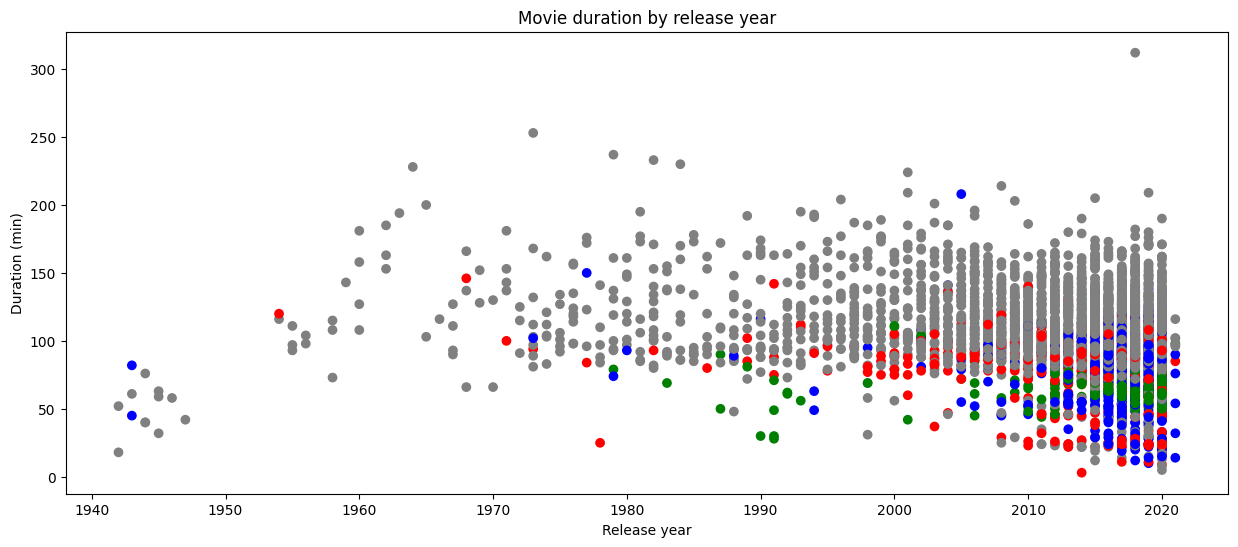

In [ ]:
# prompt: Initialize a matplotlib figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title
fig = plt.figure(figsize=(15, 6))
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors, label="Duration (min)")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.title("Movie duration by release year")
plt.show()



What I did here is I first set up a figure object using Matplotlib, making it a nice size so the plot is easy to read. Then, I created a scatter plot where the x-axis shows the release year of the movies, and the y-axis shows their duration in minutes. I used the colors list we created earlier to give each point a color based on its genre. For the labels, I made sure the x-axis is labeled "Release year" and the y-axis is labeled "Duration (min)". Lastly, I titled the plot "Movie duration by release year" to give a clear idea of what it's showing. And of course, I displayed the plot so we can see it right here in our notebook. Pretty cool, right?

**So, what I noticed here is that the movie durations seem to remain pretty stable over the years, which is interesting. However, what's really catching my attention is the emergence of new types of movies in the recent years. It seems like the film industry is continuously evolving, introducing fresh genres to appeal to different audiences. This insight gives us a deeper understanding of the changes happening in the movie landscape beyond just the length of films.**